In [1]:
pip install pandas statsmodels matplotlib


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.8 MB 1.9 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/9.8 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.8 MB 2.4 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.8 MB 2.5 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 2.6 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.8 MB 2.8 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 2.9 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 3.1 MB/s eta 0:00:02
   ---------------------------- ----------- 7.1/9.8 MB 3.3 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.8 MB 3.3 MB/s eta 0:00:01
   -----------------------

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'test_data.xlsx'
df = pd.read_excel(file_path, sheet_name='test_data')

# Set 'Date Time' as the index and convert to datetime format
df['Date Time'] = pd.to_datetime(df['Date Time'])
df.set_index('Date Time', inplace=True)

# Select the parameters you want to forecast
parameters = ['HAone', 'HAtwo', 'HS', 'HL', 'HD']


In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the Excel file
file_path = 'test_data.xlsx'
df = pd.read_excel(file_path, sheet_name='test_data', engine='openpyxl')

# Convert 'Date Time' to datetime format and set as index
df['Date Time'] = pd.to_datetime(df['Date Time'])
df.set_index('Date Time', inplace=True)

# Select relevant columns for forecasting
parameters = ['HAone', 'HAtwo', 'HS', 'HL', 'HD', 'HUO', 'HUC', 'AC-1 Current', 'AC-2 Current',
              'Lobby Current', 'Signage', 'DVR', 'UPS Output', 'UPS Current', 'Temperature',
              'Actual Temperature', 'Humidity', 'PR', 'DR', 'Raw Voltage', 'Earthing', 'UPS ',
              'Battery Voltage', 'Average Temperature', 'ups_phase_to_earth_voltage', 
              'UPS Charging', 'UPS Discharging']

df_selected = df[parameters]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2147 entries, 2024-08-15 23:59:01 to 2024-08-13 00:01:00
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2147 non-null   int64  
 1   HAone                       2147 non-null   float64
 2   HAtwo                       2147 non-null   float64
 3   HS                          2147 non-null   float64
 4   HL                          2147 non-null   float64
 5   HD                          2147 non-null   float64
 6   HUO                         2147 non-null   float64
 7   HUC                         2147 non-null   float64
 8   AC-1 Current                2147 non-null   float64
 9   AC-2 Current                2147 non-null   float64
 10  Lobby Current               2147 non-null   int64  
 11  Signage                     2147 non-null   float64
 12  DVR                         2147 non-null   float64
 1

In [5]:
df.isnull().sum().sum()

0

In [6]:
# Display first few rows to verify
print(df_selected.head())


                       HAone   HAtwo       HS       HL      HD    HUO  \
Date Time                                                               
2024-08-15 23:59:01  1119.62  1360.7  1270.03  1135.69  163.74  77.71   
2024-08-15 23:57:00  1119.62  1360.7  1270.02  1135.69  163.74  77.71   
2024-08-15 23:54:58  1119.62  1360.7  1270.02  1135.69  163.74  77.71   
2024-08-15 23:52:57  1119.62  1360.7  1270.01  1135.69  163.74  77.71   
2024-08-15 23:50:56  1119.62  1360.7  1270.01  1135.69  163.74  77.71   

                         HUC  AC-1 Current  AC-2 Current  Lobby Current  ...  \
Date Time                                                                ...   
2024-08-15 23:59:01  1228.41           0.0           0.0              0  ...   
2024-08-15 23:57:00  1228.39           0.0           0.0              0  ...   
2024-08-15 23:54:58  1228.38           0.0           0.0              0  ...   
2024-08-15 23:52:57  1228.37           0.0           0.0              0  ...   
2024-08-

In [7]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [6]:
print(df.columns)


Index(['ID', 'HAone', 'HAtwo', 'HS', 'HL', 'HD', 'HUO', 'HUC', 'AC-1 Current',
       'AC-2 Current', 'Lobby Current', 'Signage', 'DVR', 'UPS Output',
       'UPS Current', 'Temperature', 'Actual Temperature', 'Humidity', 'PR',
       'DR', 'Raw Voltage', 'Earthing', 'UPS ', 'Battery Voltage',
       'Average Temperature', 'ups_phase_to_earth_voltage', 'UPS Charging',
       'UPS Discharging'],
      dtype='object')


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the Excel file
data = pd.read_excel('test_data.xlsx', index_col=0, parse_dates=True)

# Step 1: Select only numerical columns for scaling
numerical_data = data.select_dtypes(include=[np.number])

# Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(numerical_data)

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_data.columns, index=numerical_data.index)

# Step 3: Create sequences for LSTM input
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

# Set time_step for sequence creation
time_step = 24  # Use the last 24 hours for prediction

# Create sequences
X, y = create_sequences(scaled_data, time_step)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Step 7: Make predictions for the next day
predictions = model.predict(X_test)

# Step 8: Inverse transform the predictions to get actual values
predictions_inverse = scaler.inverse_transform(predictions)

# Display predictions for the next day
predicted_df = pd.DataFrame(predictions_inverse, columns=numerical_data.columns)

print(predicted_df)

predicted_df.to_excel('predicted_next_day_consumption1.xlsx', index=False)

print(predicted_df)



Epoch 1/50


C:\Users\Ankits\AppData\Local\Temp\ipykernel_15732\3049788415.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_excel('test_data.xlsx', index_col=0, parse_dates=True)
c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0685
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0246
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0198
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0176
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0163
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0151
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0148
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0139
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0132
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0132
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0124
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0125
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0126
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0124
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0116
Epoch 16/50
54/

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Absolute Error: 0.3096877025465247
Mean Squared Error: 0.566072644422272


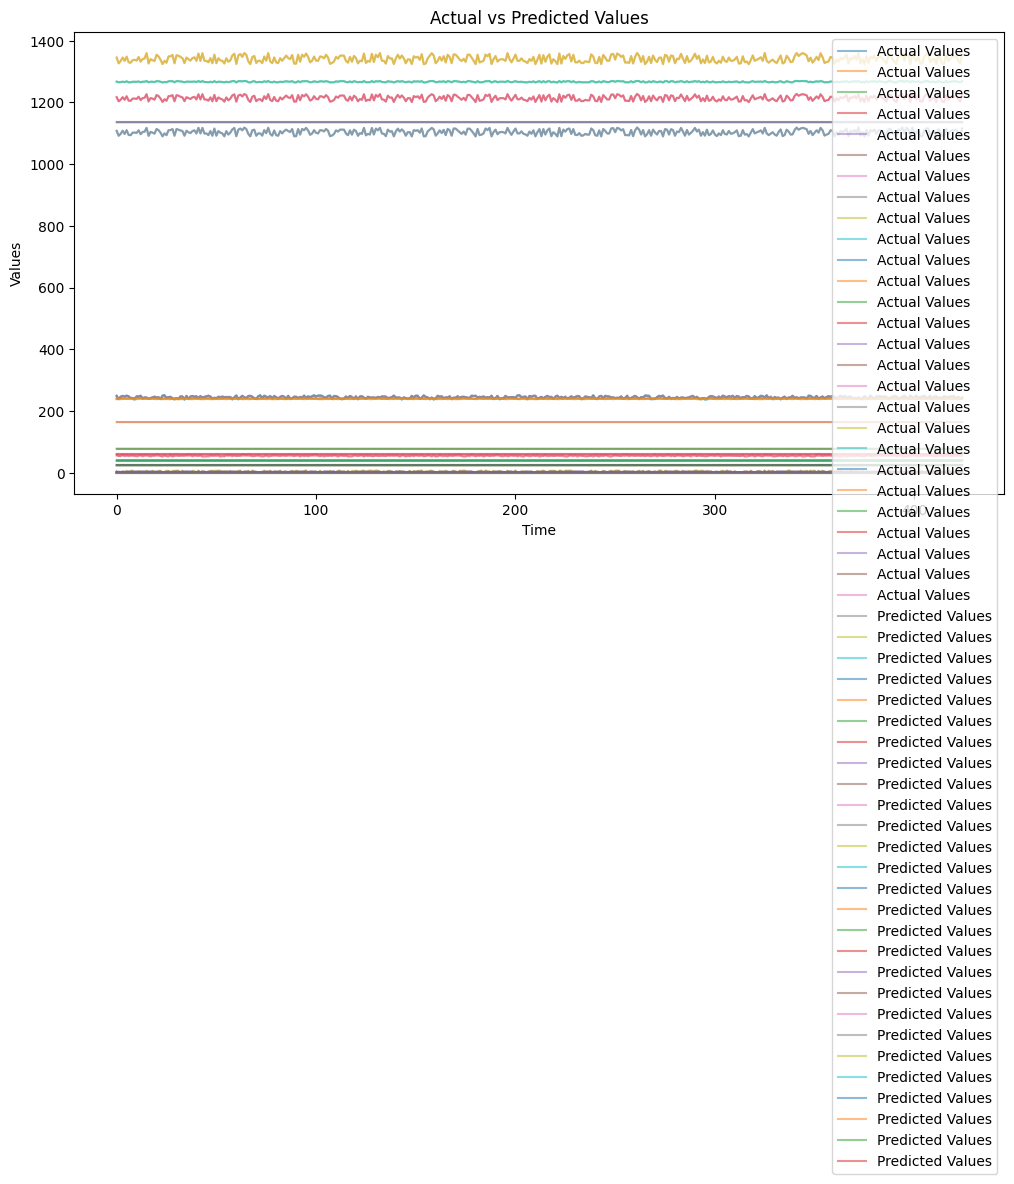

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Values', alpha=0.5)
plt.plot(y_pred_inverse, label='Predicted Values', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


['ID', 'HAone', 'HAtwo', 'HS', 'HL', 'HD', 'HUO', 'HUC', 'AC-1 Current', 'AC-2 Current', 'Lobby Current', 'Signage', 'DVR', 'UPS Output', 'UPS Current', 'Temperature', 'Actual Temperature', 'Humidity', 'PR', 'DR', 'Raw Voltage', 'Earthing', 'UPS ', 'Battery Voltage', 'Date Time', 'Average Temperature', 'ups_phase_to_earth_voltage', 'UPS Charging', 'UPS Discharging']


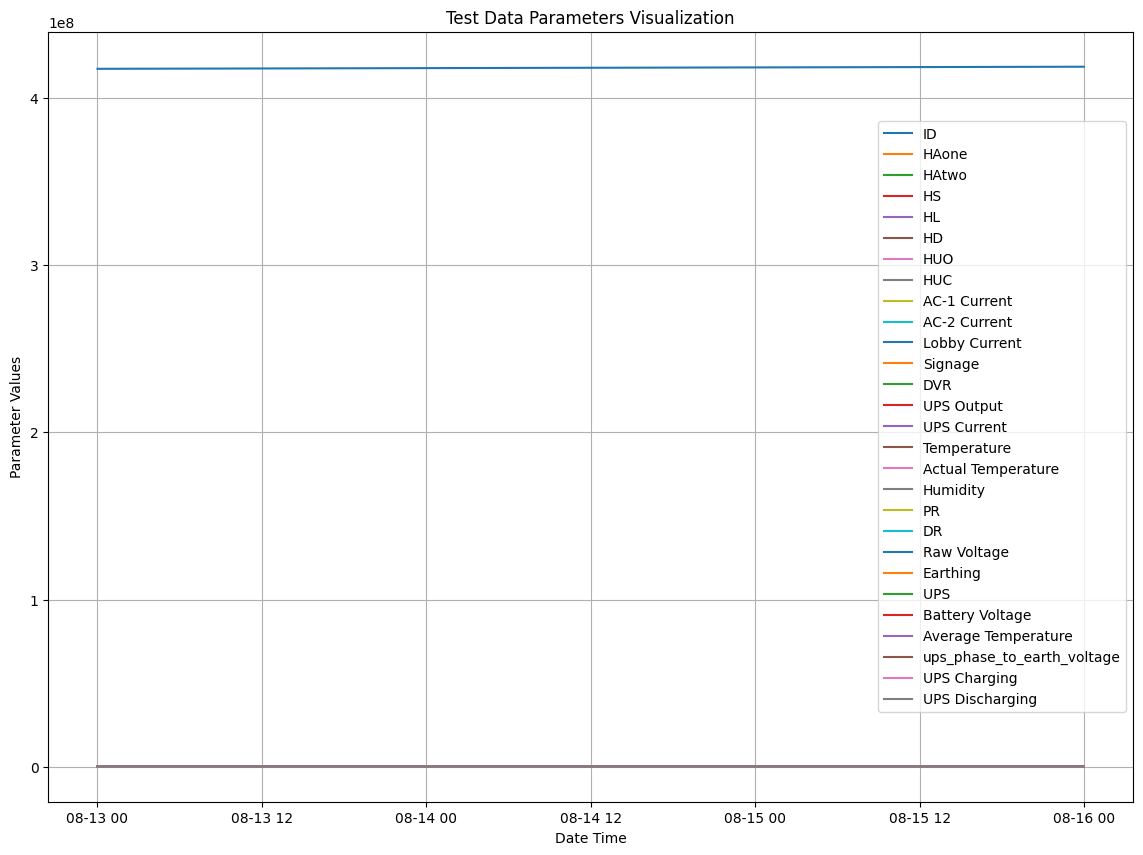

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your test_data Excel sheet
test_data = pd.read_excel('test_data.xlsx')

# Step 1: Print all columns to confirm
print(test_data.columns.tolist())

# Step 2: Convert the 'Date Time' column to datetime format
test_data['Date Time'] = pd.to_datetime(test_data['Date Time'])

# Step 3: Set the 'Date Time' column as the index
test_data.set_index('Date Time', inplace=True)

# Step 4: Visualize the parameters in test_data
plt.figure(figsize=(14, 10))
for column in test_data.columns:
    plt.plot(test_data.index, test_data[column], label=column)

plt.title('Test Data Parameters Visualization')
plt.xlabel('Date Time')
plt.ylabel('Parameter Values')
plt.legend()
plt.grid()
plt.show()


['ID', 'HAone', 'HAtwo', 'HS', 'HL', 'HD', 'HUO', 'HUC', 'AC-1 Current', 'AC-2 Current', 'Lobby Current', 'Signage', 'DVR', 'UPS Output', 'UPS Current', 'Temperature', 'Actual Temperature', 'Humidity', 'PR', 'DR', 'Raw Voltage', 'Earthing', 'UPS ', 'Battery Voltage', 'Date Time', 'Average Temperature', 'ups_phase_to_earth_voltage', 'UPS Charging', 'UPS Discharging']


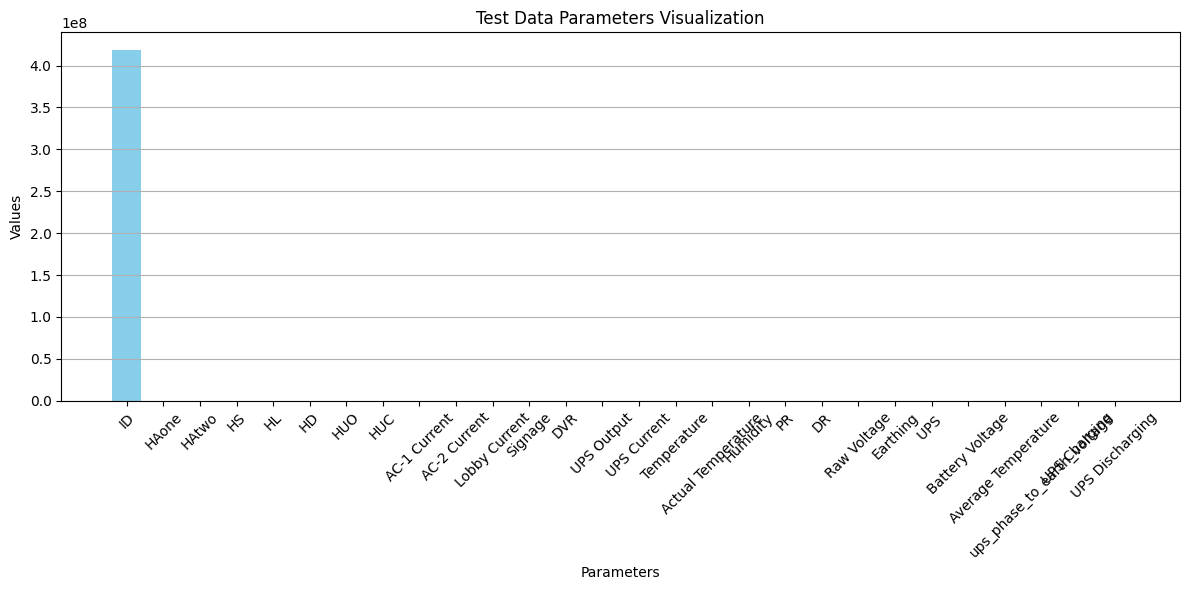

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your test_data Excel sheet
test_data = pd.read_excel('test_data.xlsx')

# Step 1: Print all columns to confirm
print(test_data.columns.tolist())

# Step 2: Remove 'Date Time' column if it exists, since we don't need it for bar graph
# If you want to keep 'Date Time' in the DataFrame, just skip this step.
if 'Date Time' in test_data.columns:
    test_data.drop(columns=['Date Time'], inplace=True)

# Step 3: Visualize the parameters in test_data as a bar graph
plt.figure(figsize=(12, 6))
plt.bar(test_data.columns, test_data.iloc[0], color='skyblue')  # Using the first row for visualization

plt.title('Test Data Parameters Visualization')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()


In [22]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [24]:
print(data.columns)


Index(['HAone', 'HAtwo', 'HS', 'HL', 'HD', 'HUO', 'HUC', 'AC-1 Current',
       'AC-2 Current', 'Lobby Current', 'Signage', 'DVR', 'UPS Output',
       'UPS Current', 'Temperature', 'Actual Temperature', 'Humidity', 'PR',
       'DR', 'Raw Voltage', 'Earthing', 'UPS ', 'Battery Voltage',
       'Average Temperature', 'ups_phase_to_earth_voltage', 'UPS Charging',
       'UPS Discharging'],
      dtype='object')


         HAone        HAtwo           HS           HL          HD        HUO  \
0  1107.268921  1344.790527  1267.421021  1135.688843  163.739075  77.710556   
1  1092.077515  1326.580322  1265.418335  1135.690552  163.739716  77.708282   
2  1098.424683  1334.166260  1265.870850  1135.691895  163.740479  77.709930   
3  1107.323242  1344.572876  1267.354858  1135.689087  163.738388  77.710503   
4  1097.712280  1333.919312  1265.816650  1135.688965  163.738174  77.709557   

           HUC  AC-1 Current  AC-2 Current  Lobby Current  ...        PR  \
0  1216.974487      3.850398      0.104998      -0.000859  ...  0.000861   
1  1203.820068      0.054351      3.683386      -0.001479  ...  0.000197   
2  1208.801147      0.767971      2.260262      -0.001838  ... -0.000724   
3  1216.869629      3.981773      0.080411      -0.000302  ...  0.000957   
4  1208.556030      1.897474      2.975456      -0.001267  ...  0.001167   

         DR  Raw Voltage    Earthing        UPS   Battery Volt

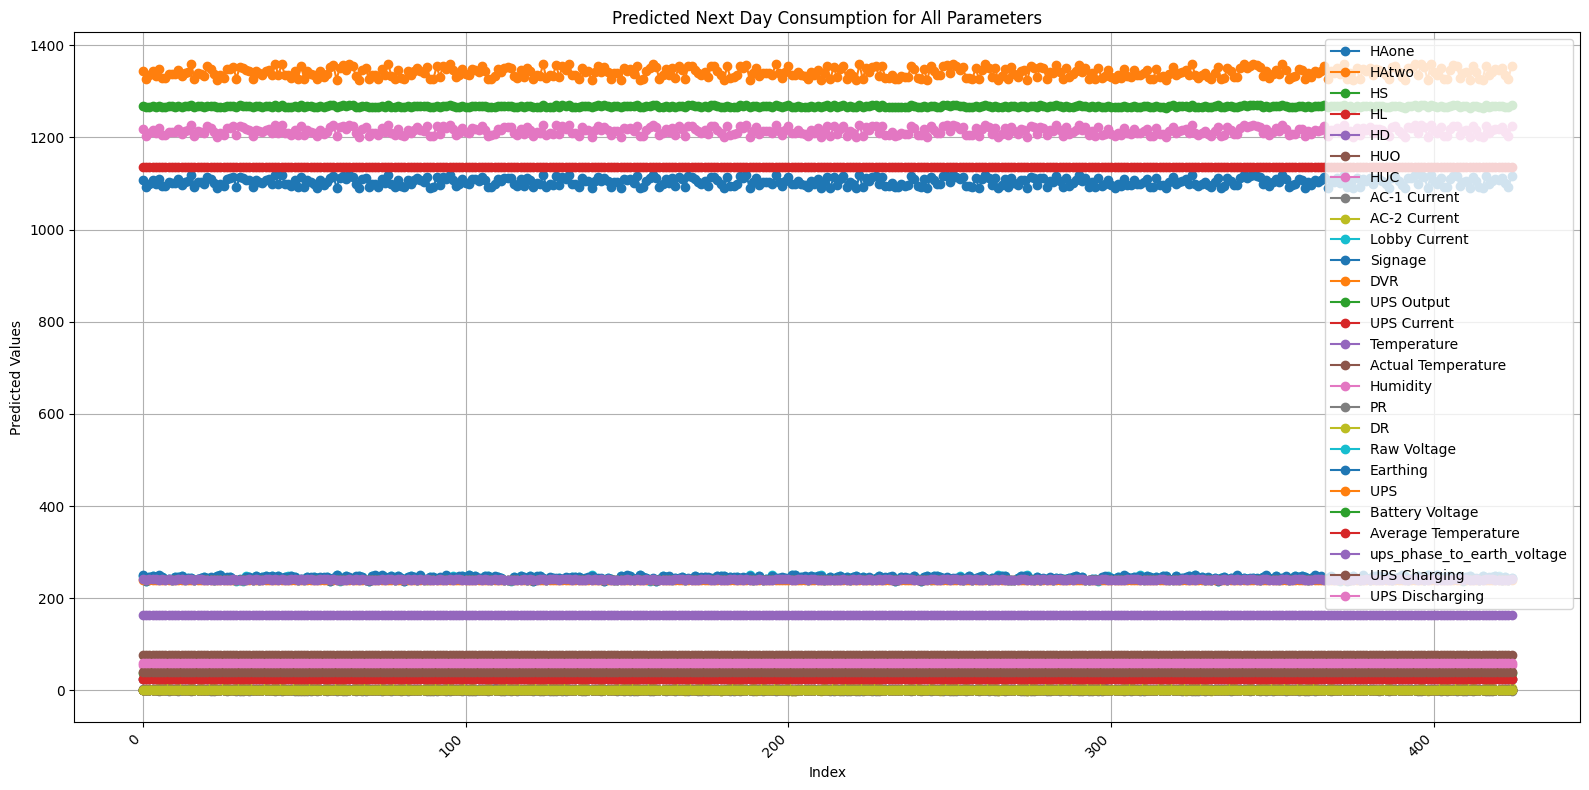

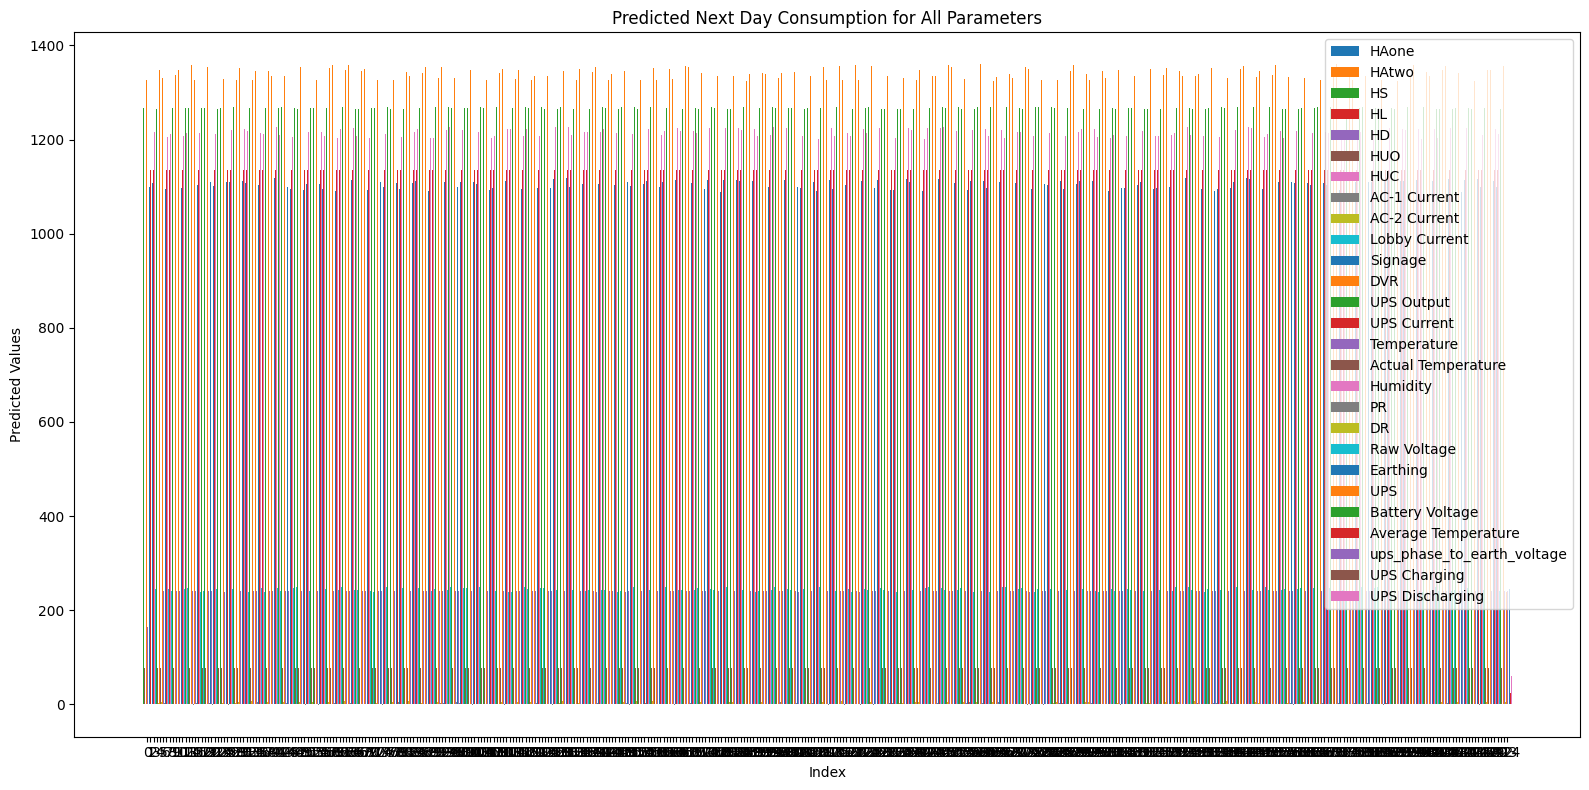

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel('predicted_next_day_consumption1.xlsx')  # Update with your file path

# Display the first few rows of the dataframe
print(data.head())

# Set the index for better visualization (if needed)
data.reset_index(drop=True, inplace=True)

# Option 1: Multiple Line Plots
plt.figure(figsize=(16, 8))

# Loop through each column (assuming first column is not a parameter)
for column in data.columns:
    plt.plot(data.index, data[column], marker='o', label=column)

plt.title('Predicted Next Day Consumption for All Parameters')
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig('predicted_consumption_all_parameters.png', bbox_inches='tight')

# Show the plot
plt.show()

# Option 2: Bar Chart for Each Parameter
plt.figure(figsize=(16, 8))

# Set the width of the bars
bar_width = 0.1
x = range(len(data))

# Plot each parameter
for i, column in enumerate(data.columns):
    plt.bar([j + bar_width * i for j in x], data[column], width=bar_width, label=column)

plt.title('Predicted Next Day Consumption for All Parameters')
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.xticks([j + bar_width * (len(data.columns) - 1) / 2 for j in x], range(len(data)))  # Adjust x-ticks
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig('predicted_consumption_all_parameters_barchart.png', bbox_inches='tight')

# Show the plot
plt.show()


         HAone        HAtwo           HS           HL          HD        HUO  \
0  1107.268921  1344.790527  1267.421021  1135.688843  163.739075  77.710556   
1  1092.077515  1326.580322  1265.418335  1135.690552  163.739716  77.708282   
2  1098.424683  1334.166260  1265.870850  1135.691895  163.740479  77.709930   
3  1107.323242  1344.572876  1267.354858  1135.689087  163.738388  77.710503   
4  1097.712280  1333.919312  1265.816650  1135.688965  163.738174  77.709557   

           HUC  AC-1 Current  AC-2 Current  Lobby Current  ...        PR  \
0  1216.974487      3.850398      0.104998      -0.000859  ...  0.000861   
1  1203.820068      0.054351      3.683386      -0.001479  ...  0.000197   
2  1208.801147      0.767971      2.260262      -0.001838  ... -0.000724   
3  1216.869629      3.981773      0.080411      -0.000302  ...  0.000957   
4  1208.556030      1.897474      2.975456      -0.001267  ...  0.001167   

         DR  Raw Voltage    Earthing        UPS   Battery Volt

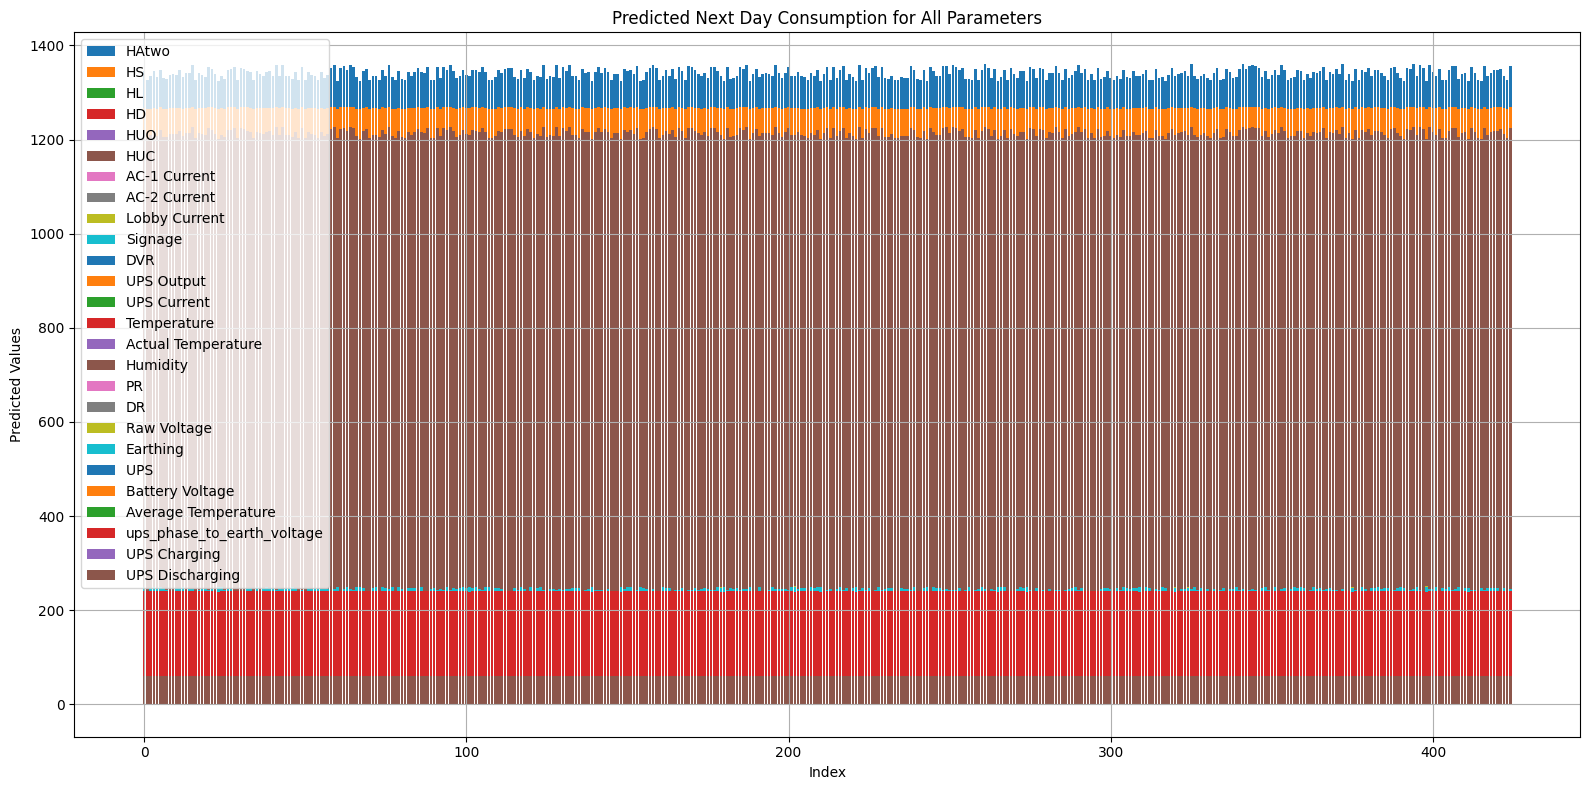

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel('predicted_next_day_consumption1.xlsx')  # Update with your file path

# Display the first few rows of the dataframe
print(data.head())

# Set the index for better visualization (if needed)
data.reset_index(drop=True, inplace=True)

# Option 2: Bar Chart for Each Parameter
plt.figure(figsize=(16, 8))

# Loop through each column (assuming first column is not a parameter)
for i, column in enumerate(data.columns):
    if i > 0:  # Exclude the first column which is the index
        plt.bar(data.index, data[column], label=column)

plt.title('Predicted Next Day Consumption for All Parameters')
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.grid()
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig('predicted_consumption_all_parameters_barchart.png', bbox_inches='tight')

# Show the plot
plt.show()

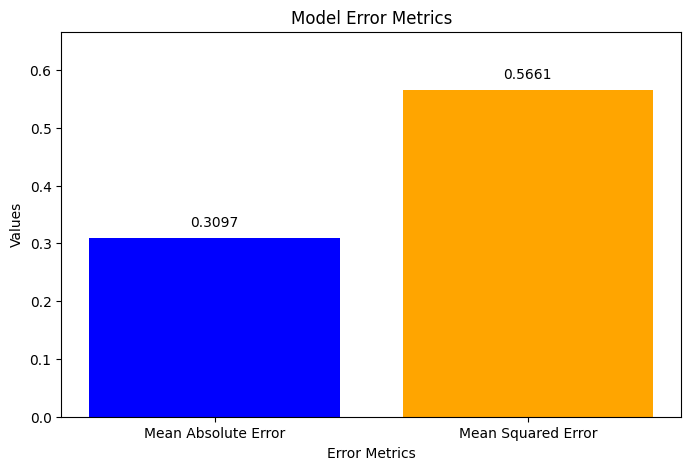

In [28]:
import matplotlib.pyplot as plt

# Parameters and their values
parameters = ['Mean Absolute Error', 'Mean Squared Error']
values = [0.3097, 0.5661]

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(parameters, values, color=['blue', 'orange'])

# Add title and labels
plt.title('Model Error Metrics')
plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.ylim(0, max(values) + 0.1)  # Set y-axis limits

# Show the values on top of the bars
for index, value in enumerate(values):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center')

# Display the plot
plt.show()


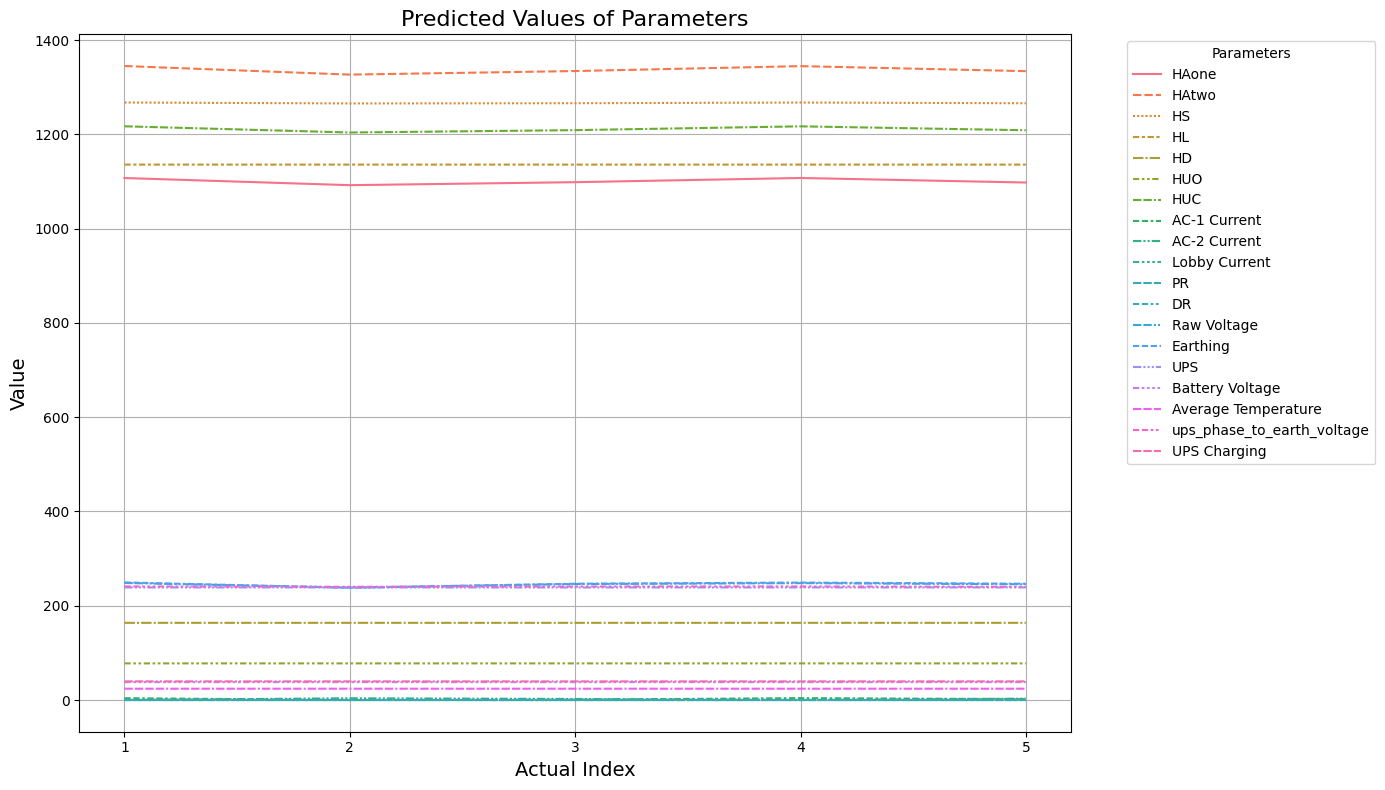

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Replace this with your actual data
data = {
    'HAone': [1107.268921, 1092.077515, 1098.424683, 1107.323242, 1097.712280],
    'HAtwo': [1344.790527, 1326.580322, 1334.166260, 1344.572876, 1333.919312],
    'HS': [1267.421021, 1265.418335, 1265.870850, 1267.354858, 1265.816650],
    'HL': [1135.688843, 1135.690552, 1135.691895, 1135.689087, 1135.688965],
    'HD': [163.739075, 163.739716, 163.740479, 163.738388, 163.738174],
    'HUO': [77.710556, 77.708282, 77.709930, 77.710503, 77.709557],
    'HUC': [1216.974487, 1203.820068, 1208.801147, 1216.869629, 1208.556030],
    'AC-1 Current': [3.850398, 0.054351, 0.767971, 3.981773, 1.897474],
    'AC-2 Current': [0.104998, 3.683386, 2.260262, 0.080411, 2.975456],
    'Lobby Current': [-0.000859, -0.001479, -0.001838, -0.000302, -0.001267],
    'PR': [0.000861, 0.000197, -0.000724, 0.000957, 0.001167],
    'DR': [-0.000041, -0.000157, 0.000675, -0.000092, -0.000174],
    'Raw Voltage': [248.298676, 238.309052, 246.026367, 247.911682, 245.579498],
    'Earthing': [249.453079, 238.242401, 246.675583, 249.175507, 246.685623],
    'UPS': [238.814255, 238.838104, 238.777466, 238.822601, 238.873627],
    'Battery Voltage': [37.999695, 38.000053, 38.000851, 38.000088, 38.001041],
    'Average Temperature': [23.999710, 23.998901, 23.999550, 23.999600, 23.999800],
    'ups_phase_to_earth_voltage': [240.986710, 240.162506, 240.788818, 240.900001, 240.100000],
    'UPS Charging': [39.580135, 39.580574, 39.579918, 39.580200, 39.580500],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the index for better visualization (optional)
df.index = range(1, len(df) + 1)

# Create a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df)

# Customize the plot
plt.title('Predicted Values of Parameters', fontsize=16)
plt.xlabel('Actual Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(df.index)  # Set x-ticks to match sample indices
plt.grid(True)
plt.legend(title='Parameters', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()


<Figure size 1400x800 with 0 Axes>

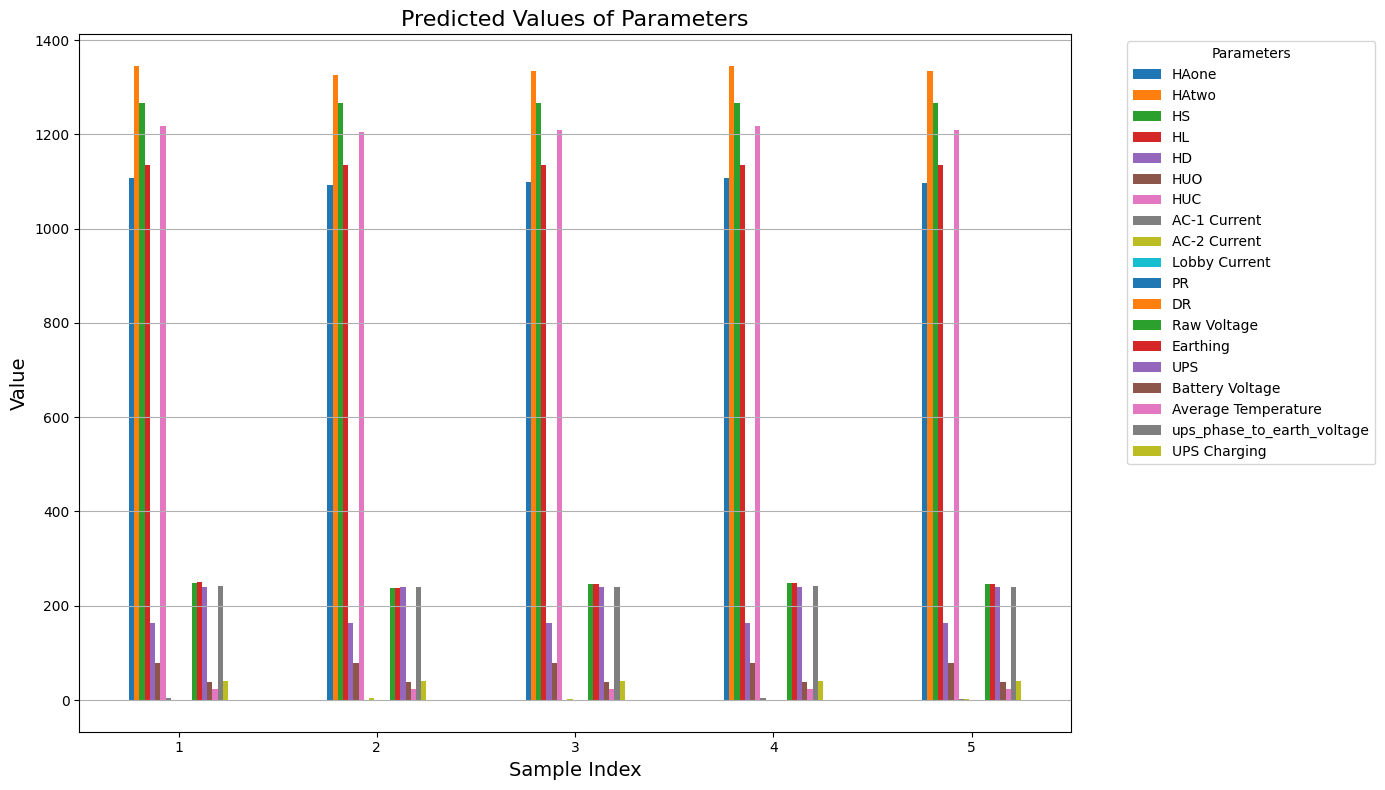

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Replace this with your actual data
data = {
    'HAone': [1107.268921, 1092.077515, 1098.424683, 1107.323242, 1097.712280],
    'HAtwo': [1344.790527, 1326.580322, 1334.166260, 1344.572876, 1333.919312],
    'HS': [1267.421021, 1265.418335, 1265.870850, 1267.354858, 1265.816650],
    'HL': [1135.688843, 1135.690552, 1135.691895, 1135.689087, 1135.688965],
    'HD': [163.739075, 163.739716, 163.740479, 163.738388, 163.738174],
    'HUO': [77.710556, 77.708282, 77.709930, 77.710503, 77.709557],
    'HUC': [1216.974487, 1203.820068, 1208.801147, 1216.869629, 1208.556030],
    'AC-1 Current': [3.850398, 0.054351, 0.767971, 3.981773, 1.897474],
    'AC-2 Current': [0.104998, 3.683386, 2.260262, 0.080411, 2.975456],
    'Lobby Current': [-0.000859, -0.001479, -0.001838, -0.000302, -0.001267],
    'PR': [0.000861, 0.000197, -0.000724, 0.000957, 0.001167],
    'DR': [-0.000041, -0.000157, 0.000675, -0.000092, -0.000174],
    'Raw Voltage': [248.298676, 238.309052, 246.026367, 247.911682, 245.579498],
    'Earthing': [249.453079, 238.242401, 246.675583, 249.175507, 246.685623],
    'UPS': [238.814255, 238.838104, 238.777466, 238.822601, 238.873627],
    'Battery Voltage': [37.999695, 38.000053, 38.000851, 38.000088, 38.001041],
    'Average Temperature': [23.999710, 23.998901, 23.999550, 23.999600, 23.999800],
    'ups_phase_to_earth_voltage': [240.986710, 240.162506, 240.788818, 240.900001, 240.100000],
    'UPS Charging': [39.580135, 39.580574, 39.579918, 39.580200, 39.580500],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the index for better visualization (optional)
df.index = range(1, len(df) + 1)

# Create a bar plot
plt.figure(figsize=(14, 8))
df.plot(kind='bar', figsize=(14, 8))

# Customize the plot
plt.title('Predicted Values of Parameters', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=0)  # Set x-ticks to match sample indices
plt.grid(axis='y')
plt.legend(title='Parameters', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()


         HAone        HAtwo           HS           HL          HD        HUO  \
0  1107.268921  1344.790527  1267.421021  1135.688843  163.739075  77.710556   
1  1092.077515  1326.580322  1265.418335  1135.690552  163.739716  77.708282   
2  1098.424683  1334.166260  1265.870850  1135.691895  163.740479  77.709930   
3  1107.323242  1344.572876  1267.354858  1135.689087  163.738388  77.710503   
4  1097.712280  1333.919312  1265.816650  1135.688965  163.738174  77.709557   

           HUC  AC-1 Current  AC-2 Current  Lobby Current  ...        PR  \
0  1216.974487      3.850398      0.104998      -0.000859  ...  0.000861   
1  1203.820068      0.054351      3.683386      -0.001479  ...  0.000197   
2  1208.801147      0.767971      2.260262      -0.001838  ... -0.000724   
3  1216.869629      3.981773      0.080411      -0.000302  ...  0.000957   
4  1208.556030      1.897474      2.975456      -0.001267  ...  0.001167   

         DR  Raw Voltage    Earthing        UPS   Battery Volt

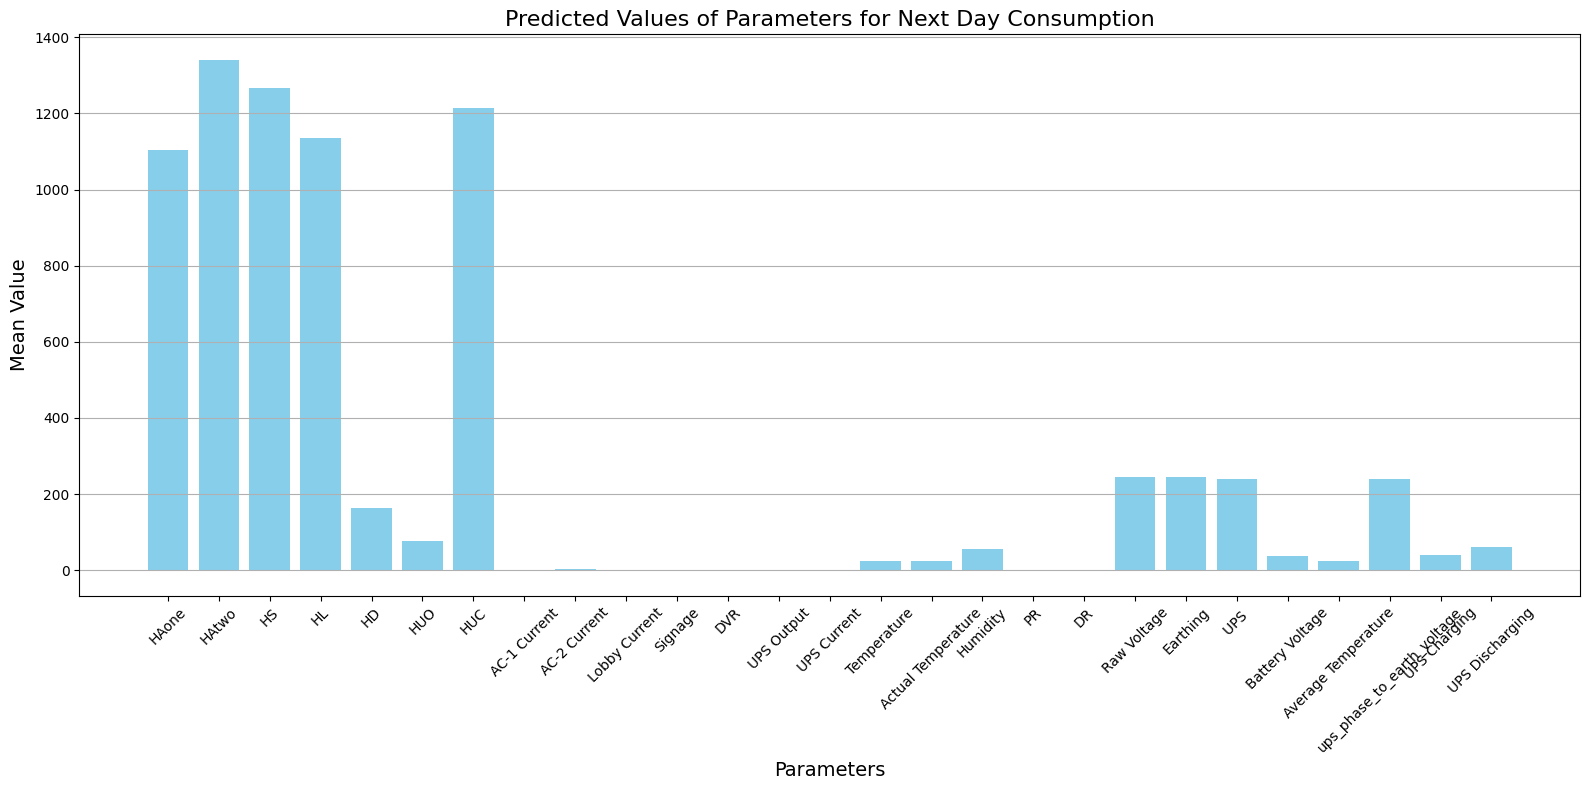

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the Excel file
file_path = 'predicted_next_day_consumption1.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame (for verification)
print(df.head())

# Step 2: Assuming the DataFrame has relevant columns for parameters
# Select the parameters for the bar graph
# If you want all parameters, just use df.columns; otherwise specify the relevant ones
parameters = df.columns.tolist()  # List of all parameter names
values = df.mean().values  # Calculate the mean for each parameter (or use .sum() or any other aggregation)

# Step 3: Create a bar plot
plt.figure(figsize=(16, 8))
plt.bar(parameters, values, color='skyblue')

# Customize the plot
plt.title('Predicted Values of Parameters for Next Day Consumption', fontsize=16)
plt.xlabel('Parameters', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-ticks for better visibility
plt.grid(axis='y')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


         HAone        HAtwo           HS           HL          HD        HUO  \
0  1108.228149  1346.100708  1267.619507  1135.690308  163.740753  77.709816   
1  1093.143311  1328.259155  1265.586182  1135.689209  163.737549  77.710869   
2  1098.938599  1334.961792  1265.993164  1135.690430  163.740479  77.710228   
3  1108.319458  1346.221802  1267.592041  1135.690430  163.740631  77.709511   
4  1098.871826  1335.264282  1266.053101  1135.689331  163.740112  77.709625   

           HUC  AC-1 Current  AC-2 Current  Lobby Current  ...        PR  \
0  1217.877319      4.279076     -0.145770       0.000070  ... -0.000183   
1  1204.952881     -0.071077      4.322837      -0.000037  ...  0.000113   
2  1209.285767      0.795202      2.392432       0.000057  ... -0.000207   
3  1217.893066      4.358664     -0.237121      -0.000019  ... -0.000199   
4  1209.401489      2.360868      2.848356      -0.000077  ...  0.000205   

         DR  Raw Voltage    Earthing        UPS   Battery Volt

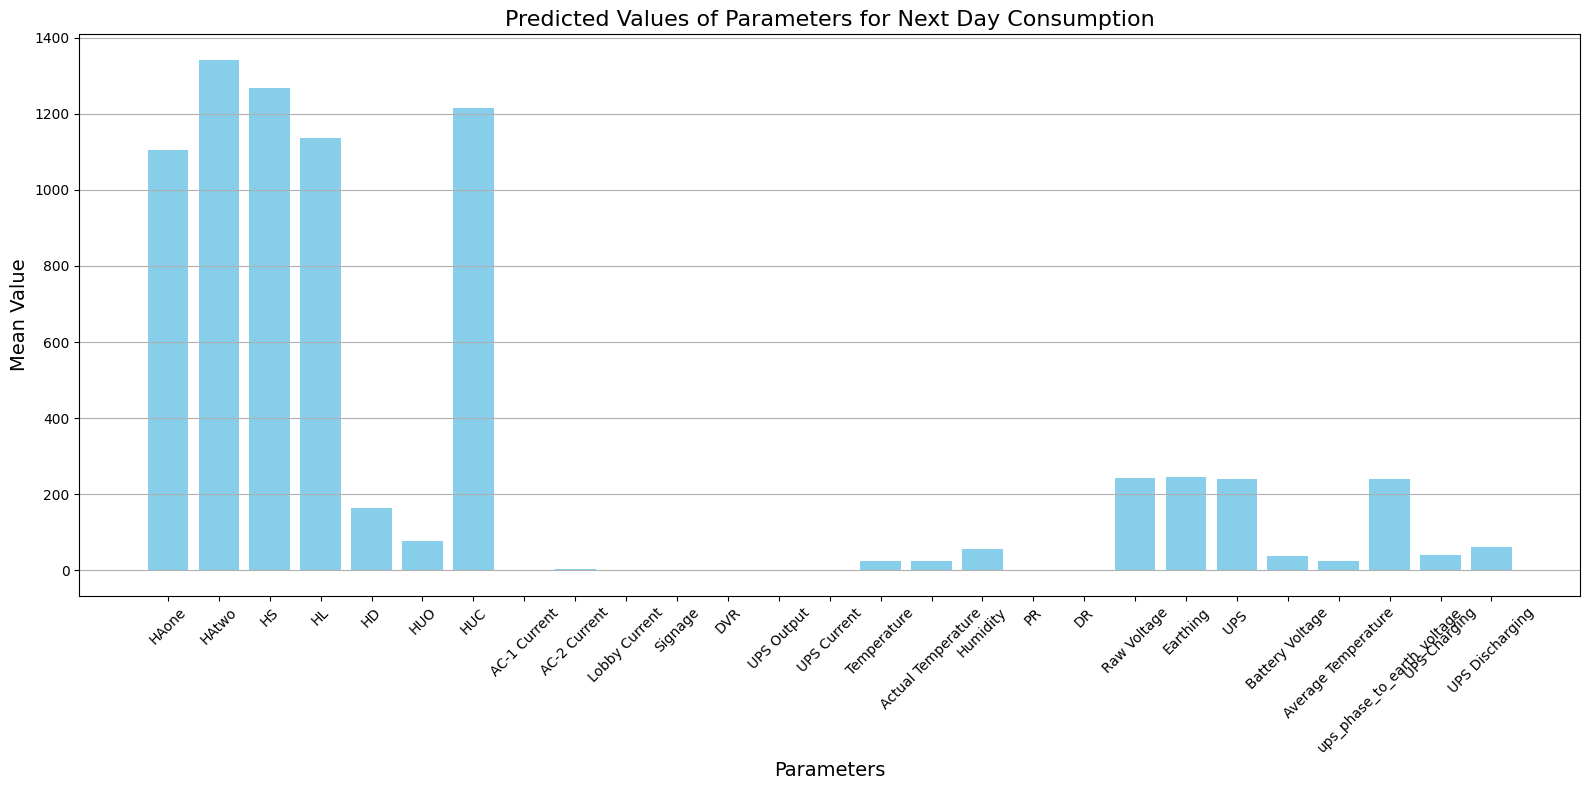

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the Excel file
file_path = 'predicted_next_day_consumption.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame (for verification)
print(df.head())

# Step 2: Assuming the DataFrame has relevant columns for parameters
# Select the parameters for the bar graph
# If you want all parameters, just use df.columns; otherwise specify the relevant ones
parameters = df.columns.tolist()  # List of all parameter names
values = df.mean().values  # Calculate the mean for each parameter (or use .sum() or any other aggregation)

# Step 3: Create a bar plot
plt.figure(figsize=(16, 8))
plt.bar(parameters, values, color='skyblue')

# Customize the plot
plt.title('Predicted Values of Parameters for Next Day Consumption', fontsize=16)
plt.xlabel('Parameters', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-ticks for better visibility
plt.grid(axis='y')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()
